# 📘 Spline cubico


In [ ]:
# importar las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange, CubicSpline, PchipInterpolator

## Ejercicio
* Estudiar la funcion de Runge $$ f(x) = \frac{1}{1+25x^2}$$
* Crear dos conjuntos:
  1. para hacer la interpolacion
  2. para probar que tan buena es la interpolacion.
* Hallar el error cuadratico medio.


In [ ]:
def runge_func(x):
  return 1/(1+25*x**2)

Creamos una lista "densa" para la variable $x$. Esta lista densa la utilizamos para graficar la función de Runge

In [ ]:
x_runge_true = np.arange(-1,1,0.01)
f_rung_true = runge_func(x_runge_true)
len(x_runge_true)

200

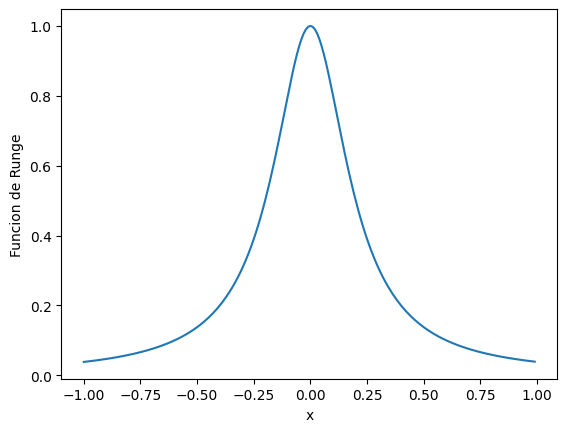

In [ ]:
plt.figure()
plt.plot(x_runge_true,f_rung_true)
plt.xlabel('x')
plt.ylabel('Funcion de Runge')
plt.show()

Creamos una segunda lista para interpolar X, no tan densa como la anterior. De esta lista se obtiene Y al evaluar X con la función Runge.

In [ ]:
X = np.linspace(-1,1,20)
Y = runge_func(X)
lagrange_interp = lagrange(X,Y)
spline_interp = CubicSpline(X,Y)

`pyplot.plot` une los puntos con una linea recta. Por esta razón, para graficar funciones se recomienda un dominio denso. Aqui se puede hacer un primer "test" de las interpolaciones. Se utilizan todos los puntos X,Y para hacer una interpolacion y comparar visualmente con la función verdadera. La función de interpolación puede ser evaluada en un conjunto denso de puntos para que la grafica sea "suave" cuando la interpolación lo es.

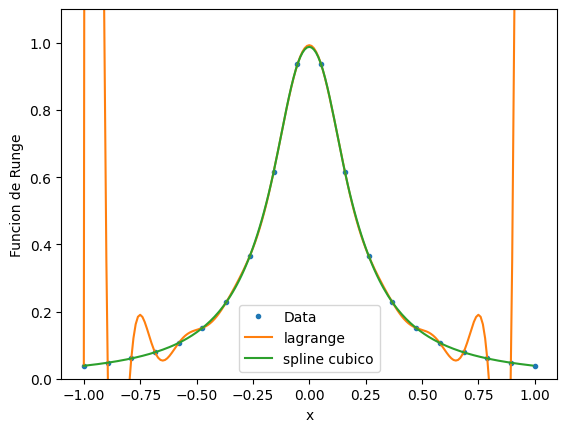

In [ ]:
plt.figure()
plt.plot(X, Y,'.', label='Data')
# lagrange
plt.plot(x_runge_true, lagrange_interp(x_runge_true), label='lagrange')
# Spline
plt.plot(x_runge_true, spline_interp(x_runge_true), label='spline cubico')
plt.xlabel('x')
plt.ylim(0,1.1)
plt.ylabel('Funcion de Runge')
plt.legend()
plt.show()

Ahora dividimos X en grupo para entrenar es decir para realizar la interpolacion, y otro grupo para probar que tan buena es la función de interpolación.

In [ ]:
x_train = X[0::2]
x_test = X[1::2]
y_train = runge_func(x_train)
y_test = runge_func(x_test)

In [20]:
# volvemos a hacer las interpolaciones
lagrange_interp = lagrange(x_train, y_train)
CS_interp = CubicSpline(x_train, y_train, bc_type='natural'  )
#  valores de y_test
y_test_lagrange = lagrange_interp(x_test)
y_test_spline = CS_interp(x_test)
# calcular el error cuadratico
SE_lagrange = (y_test - y_test_lagrange)**2
SE_CS = (y_test - y_test_spline)**2
# mean square error np.mean() o .mean()
MSE_lagrange = SE_lagrange.mean()
MSE_CS = np.mean(SE_CS)
print(f"MSE lagrange {MSE_lagrange:.3f}")
print(f"MSE CS {MSE_CS:.3f}")

MSE lagrange 17.837
MSE CS 0.001


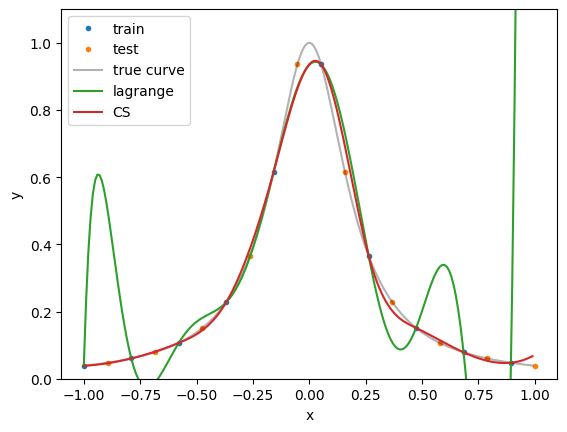

In [ ]:
plt.figure()
plt.plot(x_train, y_train,'.', label='train')
plt.plot(x_test, y_test,'.', label='test')
plt.plot(x_runge_true,f_rung_true, color='black', alpha=0.3, label='true curve') # alpha transparencia
plt.plot(x_runge_true, lagrange_interp(x_runge_true), label='lagrange')
plt.plot(x_runge_true, CS_interp(x_runge_true), label='CS')
plt.legend()
plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

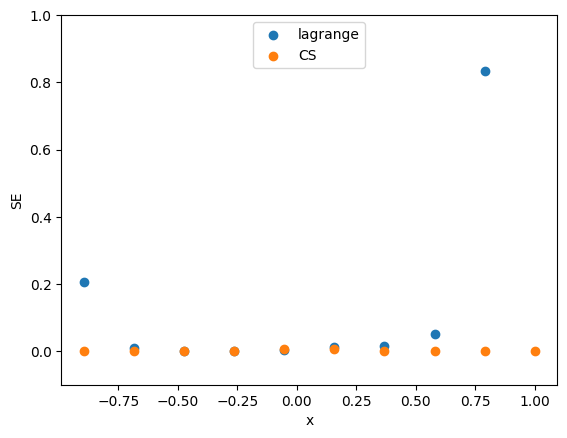

In [ ]:
plt.figure()
plt.scatter(x_test, SE_lagrange, label='lagrange')
plt.scatter(x_test, SE_CS, label='CS')
plt.ylim(-0.1,1)
plt.xlabel('x')
plt.ylabel('SE')
plt.legend(loc='upper center')
plt.show()
